<h1 style="text-align: center;"><font color='green'>Desafío 2 - Rendimiento escolar</font></h1>

## <font color='green'>Descripción</font>

Lo contactan de una escuela Portuguesa para generar un modelo que identifique aquellos
alumnos que presentan un bajo desempeño académico, medido en el promedio final del año
escolar. Para ello le envían un archivo con registros sociodemográficos y conductuales de
los alumnos de dos escuelas para perfilar a los estudiantes.
De manera adicional la psicopedagoga sugiere inspeccionar una batería de preguntas
asociadas a aspectos ambientales del alumno (de `famrel` a `health`) y ver si éstas se
pueden abstraer en categorías latentes.

## <font color='green'>Descripción de la base de datos</font>
Para responder esta pregunta deben utilizar el archivo `students.csv`.
Las variables que componen la base se detallan a continuación.
- `school`: Escuela del estudiante. (binaria: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira).
- `sex`: Sexo del estudiante. (binaria: 'F' - Mujer o 'M' - Hombre).
- `age`: Edad del estudiante. (numérica: de 15 a 22).
- `address`: Ubicación de la casa del estudiante. (binaria: 'U' - urbana o 'R' - rural).
- `famsize`: Tamaño de la familia. (binaria: 'LE3' - less or equal to 3 or 'GT3' - greater than 3).
- `Pstatus`: Estado cohabitacional de los padres. (binaria: 'T' - cohabitando juntos o 'A' - viviendo separados).
- `Medu`: Nivel educacional de la madre. (numérica: 0 - ninguno, 1 - educación básica (4to), 2 - de 5to a 9, 3 - educación media, o 4 - educación superior).
- `Fedu`: Nivel educacional del padre. (numérica: 0 - ninguno, 1 - educación básica (4to), 2 - de 5to a 9, 3 - educación media, o 4 - educación superior).
- `Mjob`: Ocupación de la madre. (nominal: 'teacher' profesora, 'health' relacionada a salud, 'services' (e.g. administración pública o policía), 'at_home' en casa u 'other' otra).
- `job`: Ocupación del padre (nominal: 'teacher' profesor, 'health' relacionado a salud, 'services' (e.g. administración pública o policía), 'at_home' en casa u 'other' otra).
- `reason`: Razón para escoger la escuela (nominal: 'home' cercano a casa, 'reputation' reputación de la escuela, 'course' preferencia de cursos u 'other' otra).
- `guardian`: Apoderado del estudiante (nominal: 'mother' madre, 'father' padre u 'other' otro).
- `traveltime`: Tiempo de viaje entre hogar y colegio. Se debe codificar como:
    - 1 si es menos de 15 min,
    - 2 si es de 15 a 30 min,
    - 3 si es de 30 min. a 1 hora,
    - 4 si es más de 1 hora.
- `studytime`: Horas semanales dedicadas al estudio. Se debe codificar como:
    - 1 si es menos de 2 horas,
    - 2 si es de 2 a 5 horas,
    - 3 si es de 5 a 10 horas,
    - 4 si es más de 10 horas.
- `failures`: Número de clases reprobadas. (numérica: n si 1<=n<3, de lo contrario 4).
- `schoolsup`: Apoyo educacional del colegio. (binaria: si o no).
- `famsup`: Apoyo educacional familiar. (binaria: si o no).
- `paid`: Clases particulares pagadas (matemáticas o portugués) (binaria: sí o no).
- `activities`: Actividades extracurriculares. (binaria: si o no).
- `nursery`: Asistió a guardería infantil. (binaria: si o no).
- `higher`: Desea proseguir estudios superiores (binaria: si o no).
- `internet`: Acceso a internet desde el hogar (binaria: si o no).
- `romantic`: Relación romántica (binaria: si o no).
- `famrel`: Calidad de las relaciones familiares. (numérica: de 1 - muy malas a 5 - excelentes).
- `freetime`: Tiempo libre fuera del colegio (numérica: de 1 - muy poco a 5 - mucho).
- `goout`: Salidas con amigos (numérica: de 1 - muy pocas a 5 - muchas).
- `Dalc`: Consumo de alcohol en día de semana (numérica: de 1 - muy bajo a 5 - muy alto).
- `Walc`: Consumo de alcohol en fines de semana (numérica: de 1 - muy bajo a 5 - muy alto).
- `health`: Estado de salud actual (numérica: from 1 - muy malo to 5 - muy bueno).
- `absences`: Cantidad de ausencias escolares (numérica: de 0 a 93).
- `G1`: Notas durante el primer semestre (numérica: de 0 a 20). **Este es uno de sus vectores objetivos para el modelo descriptivo**.
- `G2`: Notas durante el segundo semestre (numérica: de 0 a 20). **Este es uno de sus vectores objetivos para el modelo descriptivo**.
- `G3`: Promedio final (numérica: de 0 a 20). **Este es uno de sus vectores objetivos para el modelo descriptivo y el vector a predecir en el modelo predictivo**.

## <font color='green'>Aspectos adicionales a considerar</font>
- La base de datos presenta una serie de anomalías. En la escuela no tienen buenas prácticas sobre cómo ingresar datos, por lo que existen datos perdidos que están registrados bajo tres categorías: nulidade, sem validade, zero. De manera adicional, hay 3 variables numéricas que se registraron como strings, cuya interpretación en `pandas` devuelve una estructura de datos genérica. Finalmente, la base está con un encoding distinto al normal y los delimitadores son distintos.
- Para simplificar el análisis y su posterior inclusión en un modelo predictivo, se sugiere recodificar las variables binarias como 0 y 1. Se recomienda seguir el criterio de asignarle 1 a aquellas categorías minoritarias.
- El procedimiento también debe aplicarse para aquellas variables nominales con más de 2 categorías siguiendo la misma lógica.
- En la parte de modelación descriptiva, se deben generar modelos utilizando todos los predictores por cada una de las notas registradas en `G1`, `G2` y `G3`. - Para la parte de modelación predictiva, se debe generar un modelo para predecir las notas en G3.

## <font color='green'>**Hito 1: Preliminares**</font>

#### **<font color='green'>Entendimiento del problema</font>**

Nuestra misión es poder aportar en el desempeño del estrudiantado de una escuela portuguesa. Para esto, se nos pidió poder desarrollar un modelo que nos permita estimar el desempeño del estudiante durante el año (en terminos de notas) con el fin de poder hacer gestion sobre aquellos estudiante que se prediga que van a tener un mal desempeño durante el año. Como nuestro problema tiene que ver con estudiantes y escuela, debemos contar con variables que describan a cada estudiante, variables que esten relacionadas con la escuela y el alumno, y variables relacionadas con el ambiente del estudiante en el que se desempeña.

En cuanto a variables que permitan describir al estudiante, notamos que si contamos con estas, ya que tenemos registros como el sexo del estudiante, su edad, su ubicacion, relacion romantica y sus notas propiamente tal.

Por otro lado, en cuanto a variables que tengan que ver con el ambiente del estudiante, si contamos, como lo son el tamaño de la familia, relacion actual de los padres, tiempos de biaje del estudiante, horas de estudio, entre otras.

Por ultimo, variables que tengan que ver con la escuela y el estudiante tenemos como tiempo libre fuera de la escuela, apoyo educacional del colegio, nuemro de clases reprobadas, entre otras.

Todas estas variables antes mencionadas, son de relevancia para poder comprender la naturaleza y fenómeno estudiado. 

#### **<font color='green'>Distinción del problema</font>**

Dado que debemos generar un modelo para poder predecir el desempeño académico de los alumnos, en términos de notas, es que nos encontramos con un problema de regresión multiple. En particular, nos encontramos a priori con 3 variables potenciales a predecir, ya que corresponden a las notas finales de cada alumno, para el primer semestre, segundo semestre y final del curso. No obstante, las dos primeras variables (promedio de notas finales del primer y segundo semestre) solo se ocuparán para realizar un modelo descriptivo, no la implementacion de un modelo propiamente tal; por ende, la variable que ocuparemos para predecir e indicar si un alumno tendra o no un mal desempeño furante el año es la variable `G3` que tiene que ver con el promedio final del curso.

#### **<font color='green'>Justificación de métricas de evaluación</font>**

Como nos encontramos frente a un problema de regresión, debemos ocupar métricas que esten asociadas a problemas de regresion. Las métricas que ocuparemos para evaluar nuestro modelo son las siguientes:

- `R2 ajustado` 
- `MSE`
- `RMSE`

#### **<font color='green'>Librerías a utilizar</font>**

Se utilizarán las principales librerías para el analisis de datos vistas durante el modulo, las cualers son:

- `pandas` y `numpy`: Para la manipulacion de datos, junto con la recodificación y el filtrado de estos.
- `statsmodels`: Esta Libreria nos permite trabajar (en terminos econométricos) con modelos lineales, en nuestro caso la regresión multiple.
- `matplotlib` y `seaborn`: Es una libreria que nos permite implemetar algunos gráficos para la inspección visual de los datos
- `scikit-learn`: Esta libreria es la que contiene los métodos para implementar los modelos requeridos, ademas de tener las funciones para obtener las metricas de desempeño de los distintos modelos a ocupar.
- `warnings`: Se incluye este modulo para sanitizar el notebook y evitar avisos de depreciación.

#### **<font color='green'>Detalle del proceso de recodificación e ingeniería de atributos</font>**

Para la ingeniería de atributos y recodificacion, a priori se trabajará de la siguiente manera:

- `valores perdidos`: como se menciona en los enunciados, existen 3 posibles formas de encontrar datos nulos los cuales se registran a mano, las cuales son `nulidade`, `sem validade`, `zero`. Para resolver este conflicto, usaremos la funcion `replace` en todo el dataset para reemplazar dichos string por `np.nan`.
- `variable numericas registradas como string`: dado que existen 3 variables numericas que se registraron como string lo que procede es identificar primero cuales son esas 3 variables, y para cada una, quitar todos los caracteres que no son numeros y finalmente convertir la variable como `int` o `float` segun corresponda.
- `variables binarias`: como tenemos muchas variables indicadoras (binarias), se creará una función cuyo objetivo sera binarizar con `0` y `1` una lista de variables entregadas por el usuario. Ademas, se dejara como indicador 1 aquellas categorias que sean mayoritarias. Por otro lado, Tambien se creará una funcion para aquellas variables que posean más de una categoria para binarizarlas de la misma forma, dejando omitida la categora minoritaria.

Por otro lado, para aquellas variables que representan algun grado de satisfaccion o molestia con alguna situacion preguntada (como las variables `Walc`, `Dalc`, entre otras) se intentará obtener los factores latentes y asi poder reducir la cantidad de variables con las cuales se ingresarán en el modelo.

## <font color='green'>**Hito 2: Descripción**</font>

Antes de realizar cualquier análisis, importamos todas las librerías necesarias para desarrollar el análisis, junto con la carga del set de datos:

In [1]:
# Importamos las librerías a ocupar y cargamos el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sfm
import factor_analyzer as fact
from funciones import graf_pie, porcentaje_null, hist_and_box, binarization, dummies
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
import missingno as msno 
import warnings
warnings.simplefilter('ignore')

# Leemos el dataset, y ademas, como en la descripción nos dicen que algunos valores nulos vienen como 'nulidade', 'sem validade' y 'zero', le pasamos directamente este vector al parametro na_values para que los cambie inmediatamente
df = pd.read_csv('students.csv', sep = '|', na_values = ['nulidade','sem validade','zero']).drop(['Unnamed: 0'], axis=1)
display(df.head())
df.shape

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,"""4""",1.0,1.0,"""3""",6.0,5.0,6,6.0
1,GP,F,"""17""",U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,"""3""",1.0,1.0,"""3""",4.0,5.0,5,6.0
2,GP,F,"""15""",U,LE3,T,1.0,1.0,at_home,other,...,4.0,3.0,"""2""",2.0,3.0,"""3""",10.0,NaN,8,10.0
3,GP,F,"""15""",U,GT3,T,4.0,2.0,health,services,...,3.0,2.0,"""2""",1.0,1.0,"""5""",2.0,15.0,14,15.0
4,GP,F,NaN,U,GT3,T,3.0,3.0,other,other,...,4.0,3.0,"""2""",1.0,2.0,"""5""",4.0,6.0,10,10.0


(395, 33)

#### **<font color='green'>Inspección del vector objetivo</font>**

En primer lugar, veremos como se distribuye cada una de las notas del primer semestro, segundo sementre y el promedio final:

No handles with labels found to put in legend.


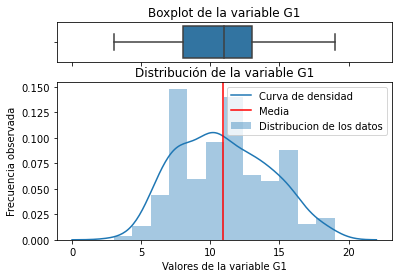

In [2]:
hist_and_box(df, 'G1')

Para las notas del primer semestre, podemos ver que el promedio de las notas esta cercano al valor 11. En base a la forma (distribucion) vemos que tiene una especie de forma similar a una normal, pero vemos que tiene olas muy pesadas, ya que se ve como hay una cantidad de valores en los extremos. Por ultimo, en base al boxplor, podemos decir que los datos estan concentrados al valor de de la media.

No handles with labels found to put in legend.


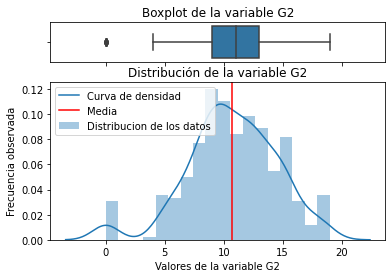

In [3]:
hist_and_box(df, 'G2')

Para las notas del segundo semestre, vemos que claramente su cola izquierda esta muys sesgada, ya que hay hartas notas `0`, esto se puede ver en el boxplot que presenta valores atipicos en el `0`. La forma es un poco más parecida a la de una normal. Por ultimo, al igual que `G1` presenta una media cercana a la nota 11.

No handles with labels found to put in legend.


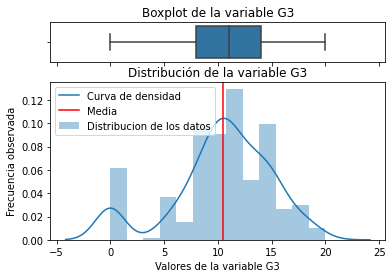

In [4]:
hist_and_box(df, 'G3')

Por ultimo, para el promedio de notas del alumno, vemos que también poseé una cola demasiado pesada (sesgo). En cuanto a la forma, no vemos que se asemeje a una curva normal. Y por ultimo, la media del promedio de las notas, esta mas cercana a la nota 10.

#### **<font color='green'>Inspección de valores nulos</font>**

Antes de cualquier analisis, debemos inspeccionar los valores nulos. Como mencionamos al principio, al leer la data le pasamos directamente el parametro `na_values` para que reemplace los `nulidade`, `sem validade` y `zero` por `np.nan`.

Ahora ocuparemos la siguiente función para ver la cantidad y el porcentaje de valores nulos que hay por cada variable, ademas de su distribución dentro del dataset:

            N_NaN  Porcentaje
schoolsup       8      0.0203
Pstatus         6      0.0152
higher          6      0.0152
nursery         6      0.0152
Mjob            6      0.0152
school          5      0.0127
studytime       5      0.0127
Walc            5      0.0127
goout           5      0.0127
famrel          5      0.0127
activities      5      0.0127
failures        5      0.0127
famsup          5      0.0127
Fedu            5      0.0127
famsize         4      0.0101
guardian        4      0.0101
reason          4      0.0101
G1              4      0.0101
absences        4      0.0101
health          4      0.0101
age             4      0.0101
Dalc            3      0.0076
traveltime      3      0.0076
internet        3      0.0076
Medu            3      0.0076
sex             3      0.0076
G3              3      0.0076
romantic        2      0.0051
freetime        2      0.0051
address         2      0.0051
paid            1      0.0025
Fjob            0      0.0000
G2        

<AxesSubplot:>

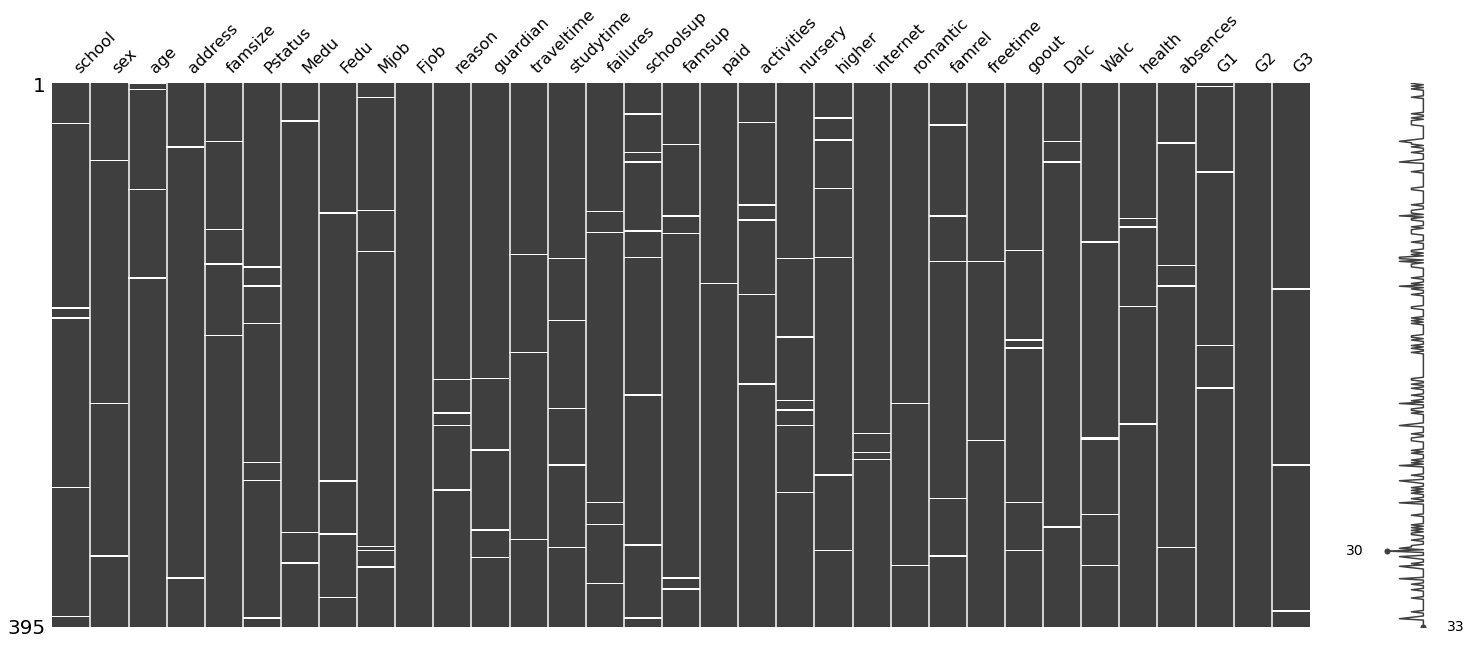

In [5]:
porcentaje_null(df)
msno.matrix(df)

Se puede ver que las unicas columnas que no presentan valores perdidos son solo `Fjob` y `G2`, todas las demas variables presentan a lo menos 1 valor perdido. En terminos de porcentaje, es practicamente nada los valores perdidos, por lo que nuestro plan de accion será eliminar todas las filas que presenten algun valor NaN para asi ocupar todas las variables. Correremos nuevamente la funcion de porcentajes para corroborar que no hay mas valores NaN.

In [6]:
df = df.dropna()
porcentaje_null(df)

            N_NaN  Porcentaje
school          0         0.0
paid            0         0.0
G2              0         0.0
G1              0         0.0
absences        0         0.0
health          0         0.0
Walc            0         0.0
Dalc            0         0.0
goout           0         0.0
freetime        0         0.0
famrel          0         0.0
romantic        0         0.0
internet        0         0.0
higher          0         0.0
nursery         0         0.0
activities      0         0.0
famsup          0         0.0
sex             0         0.0
schoolsup       0         0.0
failures        0         0.0
studytime       0         0.0
traveltime      0         0.0
guardian        0         0.0
reason          0         0.0
Fjob            0         0.0
Mjob            0         0.0
Fedu            0         0.0
Medu            0         0.0
Pstatus         0         0.0
famsize         0         0.0
address         0         0.0
age             0         0.0
G3        

#### **<font color='green'>Inspección visual de las variables</font>**

En primer lugar, en la parte de *aspectos adicionales a considerar* nos mencionan que hay 3 variables que deben ser numericas, pero que fueron mal ingresadas, por lo que ahora son string. En una inspeccion rápida, las e variables mencionadas son `age`, `goout` y `health`; ademas, nos damos cuenta que los numeros poseen comillas dobles `'"'`, por lo que para las 3 variables debemos reemplazar dicho caracter y luego transformar como un float.:

In [7]:
df['age'] = df['age'].apply(lambda x: str(x).replace('"','')).astype(float)
df['goout'] = df['goout'].apply(lambda x: str(x).replace('"','')).astype(object)
df['health'] = df['health'].apply(lambda x: str(x).replace('"','')).astype(object)
df[['age', 'goout', 'health']].dtypes

age       float64
goout      object
health     object
dtype: object

Como vemos, las variables fueron exitósamente convertidas a su tipo original. Por otro lado, nos hemos dado cuenta que hay algunas variables que si bien su naturaleza es categórica, se leyeron como tipo numérico, lo cual no es muy conveniente a pa hora de analizar dicha variable. haremos una inspeccion de estas variables:

In [8]:
df.select_dtypes(include=np.number).dtypes

age           float64
Medu          float64
Fedu          float64
traveltime    float64
studytime     float64
failures      float64
famrel        float64
freetime      float64
Dalc          float64
Walc          float64
absences      float64
G1            float64
G2              int64
G3            float64
dtype: object

Como vemos, muchas de estas variables con categorias, por lo que debemos reeconvertirlas, como es el caso de `Medu`, `Fedu`, `traveltime`, `failures` y `studytime`. Si bien, las variables `famrel`, `freetime`, `Dalc` y `Walc` su naturaleza es categorica, las dejaremos como variables numericas dado que queremos abstraer categorias latentes de ellas junto con otro grupo de variables más. Por lo tanto, le cambiaremos el tipo a las variables que correspoden:

In [9]:
df[['Medu', 'Fedu', 'traveltime', 'failures', 'studytime']] = df[['Medu', 'Fedu', 'traveltime', 'failures', 'studytime']].astype(int).astype(object)

Para inspeccionar las variables, comenzaremos con las variables categoricas. Dado que son demasiadas para ir viendolas una por una, se realizó el siguiente código para graficar todo en la misma salida, con el fin de ver todas a la vez y lograr obtener conclusiones más ágilmente:

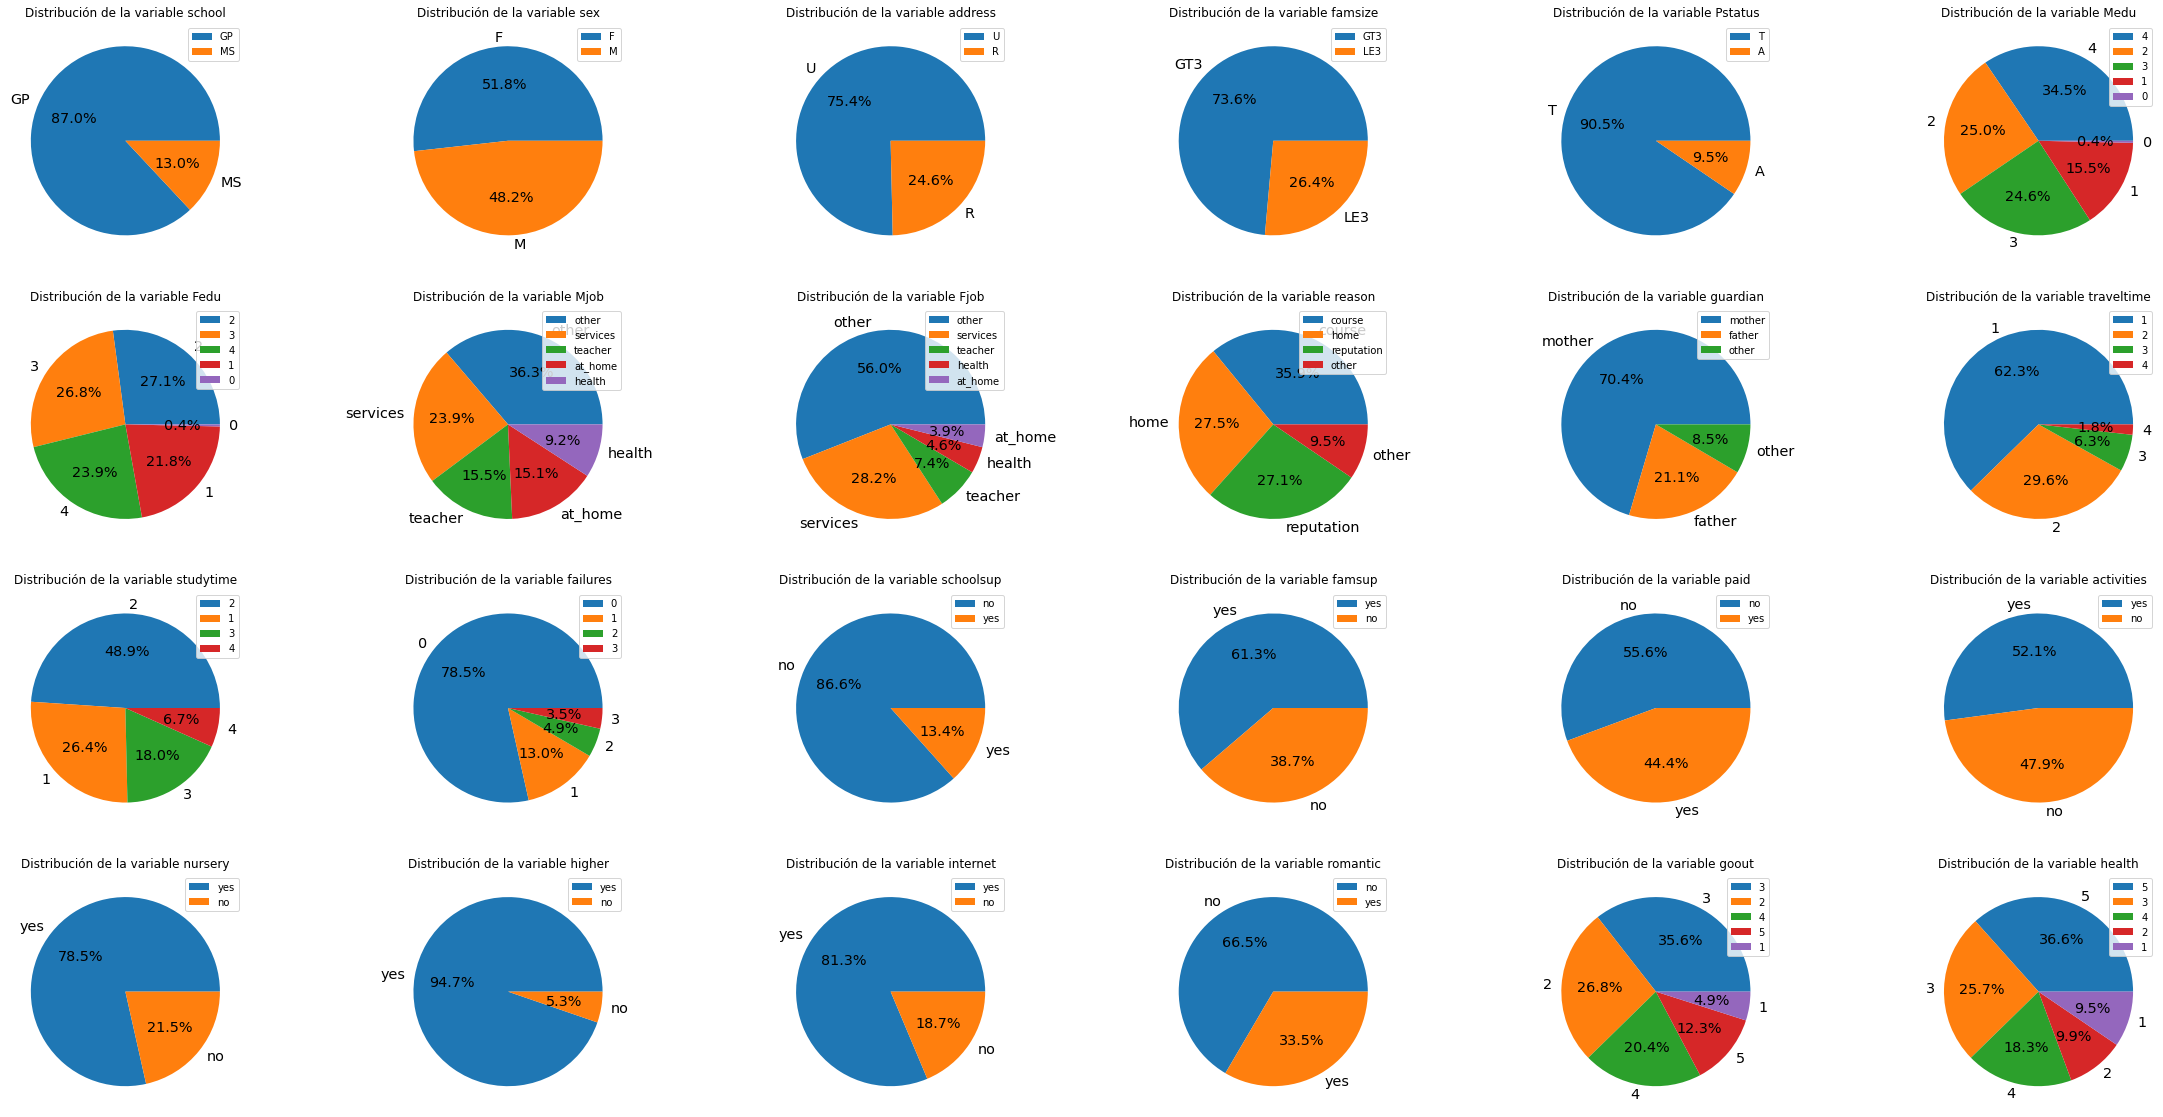

In [10]:
f, a = plt.subplots(4,6, figsize=(33,10))
i = -1
columnas = df.select_dtypes(object).columns
for row in range(4):
    for colum in range(6):
        i+= 1
        df_pie = df[columnas[i]].value_counts().to_frame()
        df_pie[columnas[i]].plot(kind='pie', title=f"Distribución de la variable {columnas[i]}", legend=True, ylabel='', autopct = '%.1f%%', ax=a[row, colum], figsize=(40,20), textprops={'size': 'x-large'})

Rapidamente, podemos apreciar lo siguiente:

- Las siguientes variables presentan homogeneidad en sus categorias, por lo que no hay razón para removerlas y no considerarlas como variables predictoras:
    - `sex`
    - `Medu`: en esta variable la categoria 0 solo tiene un 0,4% de los valores, por lo que se agrupará a otra categoría, ya que si no se considerá ese valor para entrenar, a futuro no podremos predecir la nota final de un alumno que venga con esta categoria.
    - `Fedu`: al igual que Medu, esta variable tiene una categoria 0 equivalente al 0,4% de la data, por lo que se agrupará a otra categoría, ya que si no se considerá ese valor para entrenar, a futuro no podremos predecir la nota final de un alumno que venga con esta categoria.
    - `Mjob`
    - `reason`
    - `famsup `
    - `paid`
    - `activities`
    - `goout`
    - `health`
- Por el contrario, las siguientres variables presentan un alto sesgo en su categorias, ya que 1 de sus categorias esta demasiado cargada, por lo que no la hace una buena variable para predecir, por lo que no serán consideradas para el modelo:
    - `school`
    - `address`
    - `famsize`
    - `Pstatus`
    - `guardian`
    - `failures`
    - `schoolsup`
    - `nursery`
    - `higher`
    - `internet`
- Por ultimo, las restantes variables, podriamos decir que estan justo en el limite de decidir si entra o no al modelo, por lo que para decidir, se ocupara el razonamiento logico si puede ser o no una vatriable influyente:
    - `Fjob`: el trabajo del padre no deberia ser un factor influyente en su rendimiento segun la experiencia de la vida, por lo que no entraá al modelo.
    - `traveltime`: el tiempo de viaje, en base a mi experiencia, no deberia ser un factor determinante a la hora del rendimiento escolar, por lo que no se considerará en el modelo.
    - `studytime`: el tiempo de estudio que dedica un estudiantre deberia ser un factor importante a la hora del rendimiento escolar, por lo que esta variable ingresará al modelo.
    - `romantic`: una relacion amoroso, si puede ser una causa de que un alumno baje su rendimiento academico dado que dedica mucho tiempo a la relacion, por lo que si podria ser un factor determinante a la hora de predecir, por lo que si se considerará y entrará al modelo.

De las variables que presentan un alto sesgo, serán eliminadas del modelo:

In [11]:
delete_columns = ['school'
                ,'address'
                ,'famsize'
                ,'Pstatus'
                ,'guardian'
                ,'failures'
                ,'schoolsup'
                ,'nursery'
                ,'higher'
                ,'internet'
                ,'Fjob'
]

df = df.drop(delete_columns, axis=1)
df.head()

,sex,age,Medu,Fedu,Mjob,reason,traveltime,studytime,famsup,paid,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,F,17.0,1,1,at_home,course,1,2,yes,no,...,5.0,3.0,3,1.0,1.0,3,4.0,5.0,5,6.0
3,F,15.0,4,2,health,home,1,3,yes,yes,...,3.0,2.0,2,1.0,1.0,5,2.0,15.0,14,15.0
5,M,16.0,4,3,services,reputation,1,2,yes,yes,...,5.0,4.0,2,1.0,2.0,5,10.0,15.0,15,15.0
6,M,16.0,2,2,other,home,1,2,no,no,...,4.0,4.0,4,1.0,1.0,3,0.0,12.0,12,11.0
7,F,17.0,4,4,other,home,2,2,yes,no,...,4.0,1.0,4,1.0,1.0,1,6.0,6.0,5,6.0


Como mencionamos, para las variables `Medu` y `Fedu` se añadirá la categoria 0 dentro de la categoria 1, quedando la categoría 1 como nivel educacacion nulo, o menor y igual a 4to básico. 

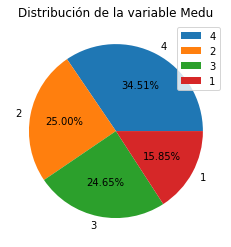

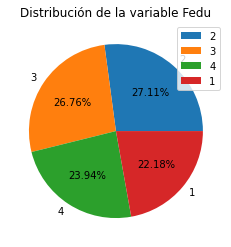

In [12]:
df[['Medu', 'Fedu']] = df[['Medu', 'Fedu']].replace(0,1)

for col in df[['Medu', 'Fedu']]:

    graf_pie(df, col)

#### **<font color='green'>preprocesamiento y recodificación de las variables</font>**

**<font color='green'>Analisis Factorial</font>**

Antes de recodificar las demás variables, vamos a asbtraer las categorias latentes tal como nos sugiere la psicopedagoga. Primero, veremos las respuestas promedio de cada bateria de preguntas.

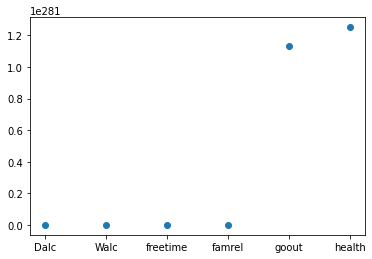

In [13]:
col_preguntas = ['famrel', 'freetime' , 'goout', 'Dalc', 'Walc', 'health']
df_preguntas = df[col_preguntas]
plt.plot(df_preguntas.mean().sort_values(), 'o')

Se puede observar que tanto las variables `goout` y `health` (salidas con amigos y estado de salud actual) tiene un puntaje promedio mucho más alto que el resto de las baterias de preguntas. Ahora analizaremos si existe alguna correlacion entre estas baterias de preguntas:

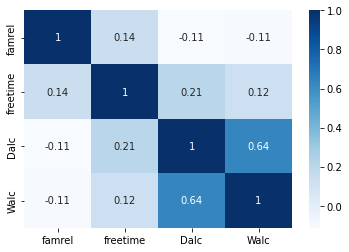

In [14]:
sns.heatmap(df_preguntas.corr(), cmap='Blues', annot = True);

Podemos observar que solo las variables `Walc` y `Dalc` presentan un grado de correlación, por lo que apriori no podriamos realizar el análisis factorial ya que esperamos que exista correlacion entre variables. Dicho esto, estudiaremos si es posible o no realizar un analisis factorial con esta bateria de preguntas. Para esto, utilizaremos la prueba de esfericidad de Barlett y Kaiser-Meyer-Olkin. 

In [15]:
# Nos aseguramos que sean el tipo correcto convirtiendo todo el dataframe como int
df_preguntas = df_preguntas.astype(float)

estadistico_corte, pvalor = fact.calculate_bartlett_sphericity(df_preguntas)
assert pvalor < 0.05

In [16]:
kmos_individuales, kmo_general = fact.calculate_kmo(df_preguntas)
assert kmo_general > 0.7

AssertionError: 

Como podemos observar, la prueba de esfericidad de Barlett pasó, pero el calculo del KMO_general y KMO_inidividual no fueron adecuados. Inspeccionaremos el valor del KMO genereal e individuales:

In [17]:
print(f'Valor KMO general: {kmo_general}')
print(f'Valores KMO individuales: {kmos_individuales}')

Valor KMO general: 0.5784452766434512
Valores KMO individuales: [0.50349705 0.57864427 0.61850565 0.58835138 0.55715052 0.59436059]


Notamos que los valores están muy por debajo del 0.7 esperamo. Por lo tanto, no se realizará el análisis factorial ya que la bateria de preguntas no es idonea.

**<font color='green'>Recodificacion</font>**

Procedemos a binaraizar las variables del dataframe, siguiendo la recomendacion de dejar la clase minoritaria como 1. Para esto se creo una funcion que binariza la variable en 0 y 1 dejando como 1 la clase minoritaria:

In [18]:
column_binarize = ['sex', 'famsup', 'paid', 'activities', 'romantic']

for col in column_binarize:
    
    df = binarization(df, col)

df.head()

,sex,age,Medu,Fedu,Mjob,reason,traveltime,studytime,famsup,paid,...,health,absences,G1,G2,G3,sex_bin,famsup_bin,paid_bin,activities_bin,romantic_bin
1,F,17.0,1,1,at_home,course,1,2,yes,no,...,3,4.0,5.0,5,6.0,0,0,0,1,0
3,F,15.0,4,2,health,home,1,3,yes,yes,...,5,2.0,15.0,14,15.0,0,0,1,0,1
5,M,16.0,4,3,services,reputation,1,2,yes,yes,...,5,10.0,15.0,15,15.0,1,0,1,0,0
6,M,16.0,2,2,other,home,1,2,no,no,...,3,0.0,12.0,12,11.0,1,1,0,1,0
7,F,17.0,4,4,other,home,2,2,yes,no,...,1,6.0,6.0,5,6.0,0,0,0,1,0


Ahora, para las variables nominales, se ocupará la funcion creada dummies para realizar el get_dammy sobre cada variable, eliminando como columna la que tenga la clase minoritaria

In [19]:
colums_dummies = ['Mjob', 'reason']

df_model = dummies(df,colums_dummies)

# Ahora eliminamos las variables que se ocuparon para hacer las dummies y para realizar la binarizacion
df_model = df_model.drop(colums_dummies+column_binarize, axis=1)
df_model

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,...,paid_bin,activities_bin,romantic_bin,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_reputation
1,17.0,1,1,1,2,5.0,3.0,3,1.0,1.0,...,0,1,0,1,0,0,0,1,0,0
3,15.0,4,2,1,3,3.0,2.0,2,1.0,1.0,...,1,0,1,0,0,0,0,0,1,0
5,16.0,4,3,1,2,5.0,4.0,2,1.0,2.0,...,1,0,0,0,0,1,0,0,0,1
6,16.0,2,2,1,2,4.0,4.0,4,1.0,1.0,...,0,1,0,0,1,0,0,0,1,0
7,17.0,4,4,2,2,4.0,1.0,4,1.0,1.0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2,2,1,2,5.0,5.0,4,4.0,5.0,...,1,1,0,0,0,1,0,1,0,0
391,17.0,3,1,2,1,2.0,4.0,5,3.0,4.0,...,0,1,0,0,0,1,0,1,0,0
392,21.0,1,1,1,1,5.0,5.0,3,3.0,3.0,...,0,1,0,0,1,0,0,1,0,0
393,18.0,3,2,3,1,4.0,4.0,1,3.0,4.0,...,0,1,0,0,0,1,0,1,0,0


Por lo tanto, estamos listo para modelar.